# Author: Mihaela Petrova

* Insert style for the notebook

In [3]:
from IPython.core.display import HTML
HTML("\n".join(open("style.css", 'r').readlines()))

## Student Performance Prediction


### 1. Introduction

The dataset used is about the performance of some students from two Portuguese secondary schools in two subjects: Math and Portuguese. It includes student grades, demographic, social and education-related features. However, the single target attribute is G3 or also called the final grade, which determines whether a student passes or fails the subject at their grade. The two datasets, eventually merged into one, contain the following fields:


1.	**school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2.	**sex** - student's sex (binary: 'F' - female or 'M' - male)
3.	**age** - student's age (numeric: from 15 to 22)
4.	**address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5.	**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6.	**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7.	**Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8.	**Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9.	**Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10.	**Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11.	**reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12.	**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13.	**traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.	**studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.	**failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	**schoolsup** - extra educational support (binary: yes or no)
17.	**famsup** - family educational support (binary: yes or no)
18.	**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	**activities** - extra-curricular activities (binary: yes or no)
20.	**nursery** - attended nursery school (binary: yes or no)
21.	**higher** - wants to take higher education (binary: yes or no)
22.	**internet** - Internet access at home (binary: yes or no)
23.	**romantic** - with a romantic relationship (binary: yes or no)
24.	**famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	**freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26.	**goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	**Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	**Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	**health** - current health status (numeric: from 1 - very bad to 5 - very good)
30.	**absences** - number of school absences (numeric: from 0 to 93)
31.	**G1** - first period grade (numeric: from 0 to 20)
32.	**G2** - second period grade (numeric: from 0 to 20)
33.	**G3** - final grade (numeric: from 0 to 20, output target)


Upon the merge of the two initial datasets, a new field called 34.**subject** was created to distinguish the performance based on either Math or Portuguese subject. In order to classify the students as passed or failed, the Erasmus grade conversion system is being used (as suggested in the paper published together with the dataset) and therefore, two new fields are introduced: 35.**final_performance** to look at the different ranges of scores (Poor depicted as 1; Fair as 2; Good as 3; Very Good as 4, Excellent as 5) and 36.**pass_score** (either 0 for Fail or 1 for Pass) to look at the most interesting for us feature of a student, i.e. whether they passed or failed.

**Data Source:** https://archive.ics.uci.edu/dataset/320/student+performance


### 2. Load Libraries and Data

To start with, my first task is to explore the data I need to work with.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [10]:
# Read the two datasets
math_data = pd.read_csv('student-mat.csv', sep=';')
prt_data = pd.read_csv('student-por.csv', sep=';')

In [11]:
math_data.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [12]:
prt_data.count()

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64

In [13]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
prt_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [15]:
# Check if both datasets contain the same columns
print("Columns in math_data", math_data.columns)
print("Columns in prt_data", prt_data.columns)

Columns in math_data Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns in prt_data Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [16]:
# Add a new column "subject" to distinguish between the subjects
math_data['subject'] = 'math'
prt_data['subject'] = 'portuguese'

In [17]:
# Merge the two datasets into one
student_data = pd.concat([math_data, prt_data], ignore_index=True, sort=False)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [18]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [19]:
# Check the descriprive statistics of the columns containing numeric values.
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


My first important takeaway is that the average final performance (G3) is higher than the average performance of both first (G1) and second (G2) period. This insight opens a discussion to what extent the final grade is determined by the performance throught the school year. I will have a look at it later. For now my assumption is that in the third period there might be a state/final exam that weighs more for the final grade rather than the average performance. However, the dataset lacks any information about such feature.

### 3. Data Preprocessing

In [22]:
# Check for missing values
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [23]:
# Check for duplicated rows
student_data.duplicated().sum()

0

In [24]:
# Check for the unique values in each column
for col in student_data.columns:
    print(col, student_data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17 32]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3  0]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4  1]
subject ['math' '

In [25]:
# Create a test dataset to perform some checks on the relationship between the grades
test = student_data[['G1', 'G2', 'G3']]
test.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [26]:
# Check if the final grade is the mean value of the preivous 2 periods
test['is_mean'] = test['G3'] == (test[['G1', 'G2']].mean(axis=1))
print(test)

      G1  G2  G3  is_mean
0      5   6   6    False
1      5   5   6    False
2      7   8  10    False
3     15  14  15    False
4      6  10  10    False
...   ..  ..  ..      ...
1039  10  11  10    False
1040  15  15  16    False
1041  11  12   9    False
1042  10  10  10     True
1043  10  11  11    False

[1044 rows x 4 columns]


In [27]:
# See to what extent G3 is based on G1 and G2 grades
test['is_mean'].value_counts()

is_mean
False    847
True     197
Name: count, dtype: int64

In [28]:
# Add the mean value of the period 1 and period 2 grades
student_data['G_mean'] = student_data[['G1', 'G2']].mean(axis=1)

In [29]:
# Add a new column to define students' performance using a 5-level classification based on the Erasmus grade conversion system
performance_conditions = [
    student_data['G3'] < 10,
    (student_data['G3'] >= 10) & (student_data['G3'] < 12),
    (student_data['G3'] >= 12) & (student_data['G3'] < 14),
    (student_data['G3'] >= 14) & (student_data['G3'] < 16),
    student_data['G3'] >= 16
]

# Categories range from 1 to 5 where 1 is fail and the rest are successfull students
performance_categories = [1, 2, 3, 4, 5]
student_data['final_performance'] = np.select(performance_conditions, performance_categories, default=0)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,G_mean,final_performance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,math,5.5,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,math,5.0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,math,7.5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,math,14.5,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,math,8.0,2


In [30]:
student_data['final_performance'].value_counts()

final_performance
2    304
1    230
3    216
4    172
5    122
Name: count, dtype: int64

In [31]:
# Create a copy of df and add a new column to define if students passed or failed based on their grades and the Erasmus grade conversion system
pass_students = student_data.copy()

pass_conditions = [
    student_data['G3'] < 10,
    student_data['G3'] >= 10
]

# Fail = 0; Pass = 1
pass_categories = [0, 1]
pass_students['pass_score'] = np.select(pass_conditions, pass_categories, default=-1)
pass_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,subject,G_mean,final_performance,pass_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,math,5.5,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,math,5.0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,math,7.5,2,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,math,14.5,4,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,math,8.0,2,1


In [32]:
pass_students['pass_score'].value_counts()

pass_score
1    814
0    230
Name: count, dtype: int64

In [33]:
# Convert object columns to numeric ones
[i for i in student_data.columns if student_data[i].dtype in ['O']]

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'subject']

In [34]:
# School: 'GP' (Gabriel Pereira) = 1, 'MS' (Mousinho da Silveira) = 2
student_data['school'] = student_data['school'].replace({'GP': 1, 'MS': 2})
student_data['school'].value_counts()

school
1    772
2    272
Name: count, dtype: int64

In [35]:
# Sex: 'M' (male) = 1, 'F' (female) = 2
student_data['sex'] = student_data['sex'].replace({'M': 1, 'F': 2})
student_data['sex'].value_counts()

sex
2    591
1    453
Name: count, dtype: int64

In [36]:
# Address: 'U' (urban) = 1, 'R' (rural) = 2
student_data['address'] = student_data['address'].replace({'U': 1, 'R': 2})
student_data['address'].value_counts()

address
1    759
2    285
Name: count, dtype: int64

In [37]:
# Family Size: 'LE3' (less or equal to 3) = 1, 'GT3' (greater than 3) = 2
student_data['famsize'] = student_data['famsize'].replace({'LE3': 1, 'GT3': 2})
student_data['famsize'].value_counts()

famsize
2    738
1    306
Name: count, dtype: int64

In [38]:
# Parent's Cohabitation Status: 'A' (apart) = 1, 'T' (living together) = 2
student_data['Pstatus'] = student_data['Pstatus'].replace({'A': 1, 'T': 2})
student_data['Pstatus'].value_counts()

Pstatus
2    923
1    121
Name: count, dtype: int64

In [39]:
# Mother's Job: 'at_home' = 1, 'teacher' = 2, 'health' = 3, 'services' = 4, 'other' = 5
student_data['Mjob'] = student_data['Mjob'].replace({'at_home': 1, 'teacher': 2, 'health': 3, 'services': 4, 'other': 5})
student_data['Mjob'].value_counts()

Mjob
5    399
4    239
1    194
2    130
3     82
Name: count, dtype: int64

In [40]:
# Father's Job: 'at_home' = 1, 'teacher' = 2, 'health' = 3, 'services' = 4, 'other' = 5
student_data['Fjob'] = student_data['Fjob'].replace({'at_home': 1, 'teacher': 2, 'health': 3, 'services': 4, 'other': 5})
student_data['Fjob'].value_counts()

Fjob
5    584
4    292
2     65
1     62
3     41
Name: count, dtype: int64

In [41]:
# Reason to Choose This School: 'home' = 1, 'reputation' = 2, 'course' = 3, 'other' = 4
student_data['reason'] = student_data['reason'].replace({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})
student_data['reason'].value_counts()

reason
3    430
1    258
2    248
4    108
Name: count, dtype: int64

In [42]:
# Student's Guardian: 'mother' = 1, 'father' = 2, 'other' = 3
student_data['guardian'] = student_data['guardian'].replace({'mother': 1, 'father': 2, 'other': 3})
student_data['guardian'].value_counts()

guardian
1    728
2    243
3     73
Name: count, dtype: int64

In [43]:
# Extra Educational Support: 'yes' = 1, 'no' = 0
student_data['schoolsup'] = student_data['schoolsup'].replace({'yes': 1, 'no': 0})
student_data['schoolsup'].value_counts()

schoolsup
0    925
1    119
Name: count, dtype: int64

In [44]:
# Family Educational Support: 'yes' = 1, 'no' = 0
student_data['famsup'] = student_data['famsup'].replace({'yes': 1, 'no': 0})
student_data['famsup'].value_counts()

famsup
1    640
0    404
Name: count, dtype: int64

In [45]:
# Extra Paid Classes within the Course Subject (Math or Portuguese): 'yes' = 1, 'no' = 0
student_data['paid'] = student_data['paid'].replace({'yes': 1, 'no': 0})
student_data['paid'].value_counts()

paid
0    824
1    220
Name: count, dtype: int64

In [46]:
# Extra-curricular Activities: 'yes' = 1, 'no' = 0
student_data['activities'] = student_data['activities'].replace({'yes': 1, 'no': 0})
student_data['activities'].value_counts()

activities
0    528
1    516
Name: count, dtype: int64

In [47]:
# Attended Nursery School: 'yes' = 1, 'no' = 0
student_data['nursery'] = student_data['nursery'].replace({'yes': 1, 'no': 0})
student_data['nursery'].value_counts()

nursery
1    835
0    209
Name: count, dtype: int64

In [48]:
# Wants to Take Higher Education: 'yes' = 1, 'no' = 0
student_data['higher'] = student_data['higher'].replace({'yes': 1, 'no': 0})
student_data['higher'].value_counts()

higher
1    955
0     89
Name: count, dtype: int64

In [49]:
# Internet Access at Home: 'yes' = 1, 'no' = 0
student_data['internet'] = student_data['internet'].replace({'yes': 1, 'no': 0})
student_data['internet'].value_counts()

internet
1    827
0    217
Name: count, dtype: int64

In [50]:
# With a Romantic Relationship: 'yes' = 1, 'no' = 0
student_data['romantic'] = student_data['romantic'].replace({'yes': 1, 'no': 0})
student_data['romantic'].value_counts()

romantic
0    673
1    371
Name: count, dtype: int64

In [51]:
# Subject: 'Math' = 1, 'Portuguese' = 2
student_data['subject'] = student_data['subject'].replace({'math': 1, 'portuguese': 2})
student_data['subject'].value_counts()

subject
2    649
1    395
Name: count, dtype: int64

In [52]:
# Separate dataframe into different objects
no_grades_df = student_data.drop(pass_students[['G1', 'G2', 'G3', 'G_mean', 'final_performance']], axis=1).copy()
pass_students['pass_score'] = pd.to_numeric(pass_students['pass_score'], errors="coerce").fillna(0).astype('int64')
#X = student_data
X = no_grades_df
y = pass_students['pass_score']

In [53]:
# Split data into training and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify = y, random_state = 1) 

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

730 314 730 314


In [54]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
64,1,2,15,1,1,2,4,3,4,4,...,1,1,4,4,4,2,4,2,0,1
1015,2,2,17,1,1,2,4,4,1,1,...,1,1,2,3,4,1,1,1,4,2
933,2,2,16,2,1,2,2,2,5,5,...,0,1,4,3,3,2,2,5,2,2
481,1,2,16,1,1,2,2,2,1,5,...,0,0,4,3,4,1,2,2,6,2
689,1,2,18,2,2,2,2,2,5,5,...,0,0,3,2,3,1,1,5,4,2


In [55]:
# Standardize the data (separately for train and test data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Tsrain_test_split returns numpy so convert the datasets to DataFrame again
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [57]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
0,-0.607952,0.85192,-1.38134,-0.614295,-1.537548,0.358168,1.226244,0.561356,0.333273,-0.202021,...,0.493570,1.332541,0.109275,0.786988,0.776361,0.528777,1.371564,-1.042177,-0.683966,-1.260418
1,1.644866,0.85192,0.20416,-0.614295,-1.537548,0.358168,1.226244,1.467971,-1.613040,-2.835503,...,0.493570,1.332541,-2.017945,-0.167333,0.776361,-0.540495,-0.982453,-1.740149,-0.075255,0.793388
2,1.644866,0.85192,-0.58859,1.627882,-1.537548,0.358168,-0.523821,-0.345259,0.982044,0.675807,...,-2.026054,1.332541,0.109275,-0.167333,-0.090219,0.528777,-0.197780,1.051739,-0.379611,0.793388
3,-0.607952,0.85192,-0.58859,-0.614295,-1.537548,0.358168,-0.523821,-0.345259,-1.613040,0.675807,...,-2.026054,-0.750446,0.109275,-0.167333,0.776361,-0.540495,-0.197780,-1.042177,0.229101,0.793388
4,-0.607952,0.85192,0.99691,1.627882,0.650386,0.358168,-0.523821,-0.345259,0.982044,0.675807,...,-2.026054,-0.750446,-0.954335,-1.121654,-0.090219,-0.540495,-0.982453,1.051739,-0.075255,0.793388


### 4. Exploratory Data Analysis

In [59]:
# Create a DataFrame of all successful students
successful_students = pass_students.loc[pass_students['pass_score'] == 1]
successful_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,subject,G_mean,final_performance,pass_score
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,math,7.5,2,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,math,14.5,4,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,math,8.0,2,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,5,10,15,15,15,math,15.0,4,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,12,12,11,math,12.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,2,5,4,7,9,10,portuguese,8.0,2,1
1039,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,portuguese,10.5,2,1
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,portuguese,15.0,5,1
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,portuguese,10.0,2,1


<Axes: xlabel='pass_score', ylabel='count'>

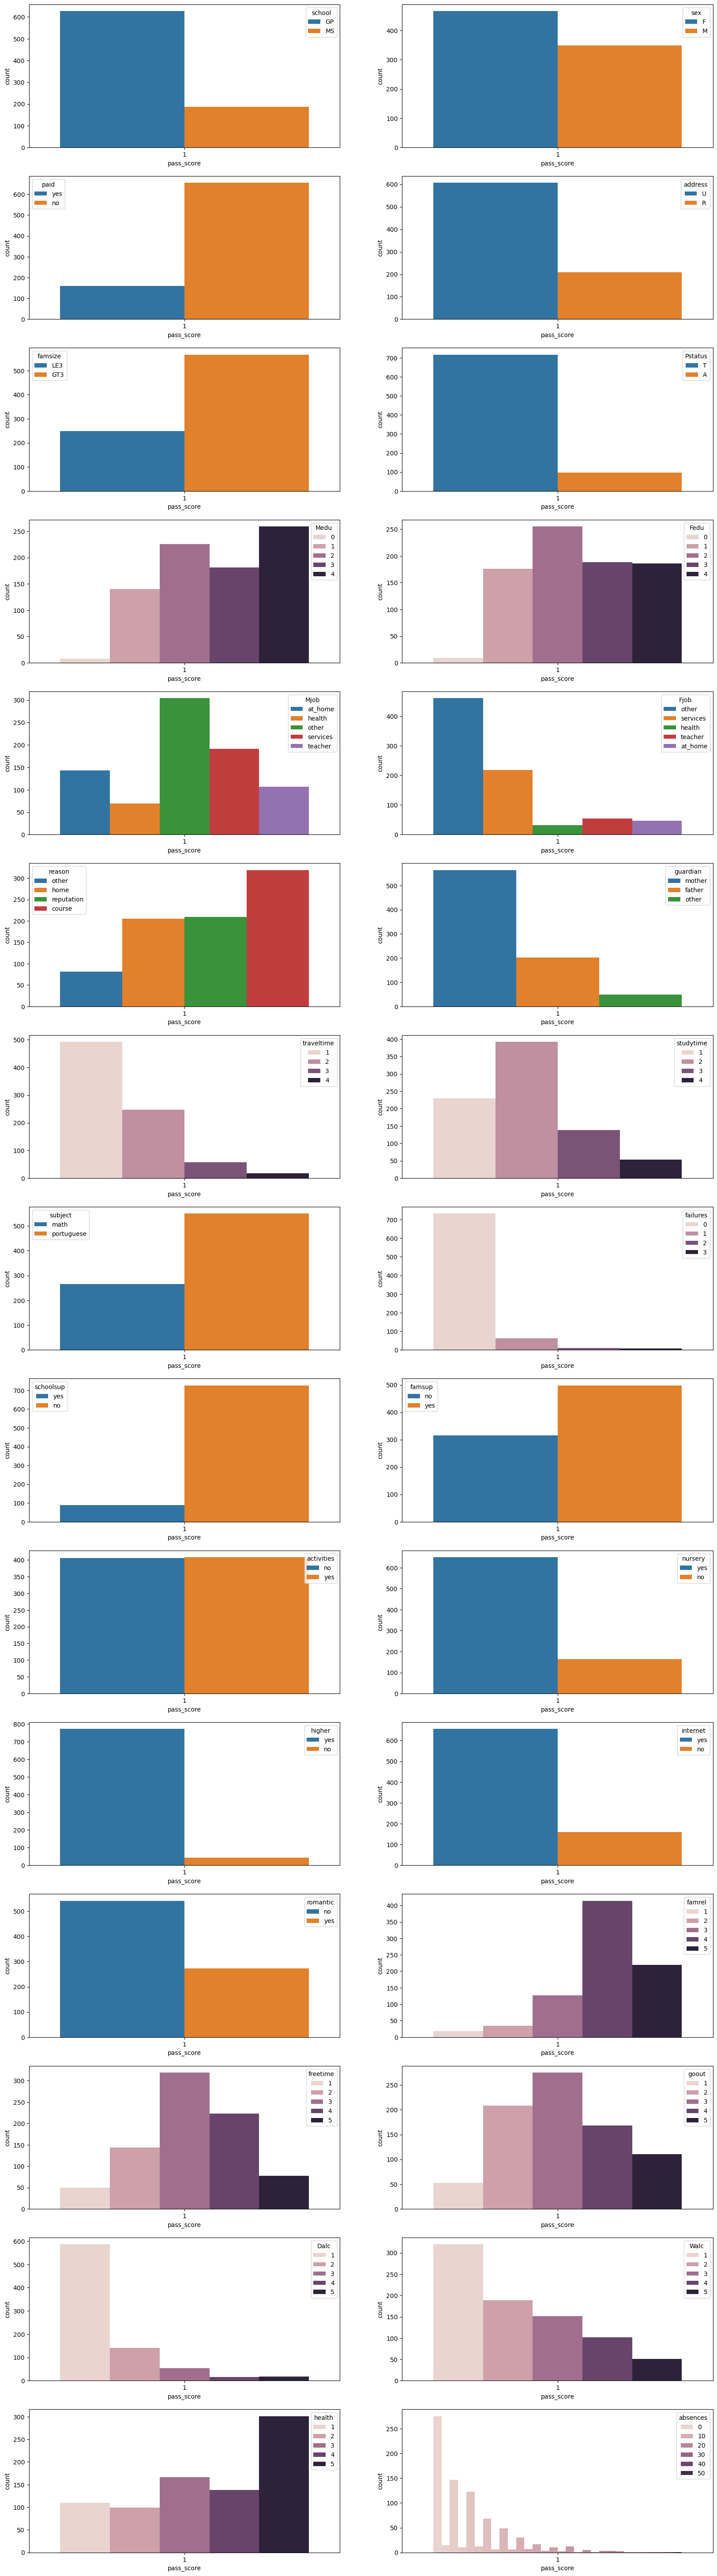

In [60]:
# Visualize relationships between "pass_score" and the rest of the features of the data, use initial DataFrame
_,axss = plt.subplots(15,2, figsize=[20,75])
sns.countplot(x='pass_score', hue='school', data=successful_students, ax=axss[0][0]) 
sns.countplot(x='pass_score', hue='sex', data=successful_students, ax=axss[0][1])
sns.countplot(x='pass_score', hue='paid', data=successful_students, ax=axss[1][0])
sns.countplot(x='pass_score', hue='address', data=successful_students, ax=axss[1][1])
sns.countplot(x='pass_score', hue='famsize', data=successful_students, ax=axss[2][0])
sns.countplot(x='pass_score', hue='Pstatus', data=successful_students, ax=axss[2][1])
sns.countplot(x='pass_score', hue='Medu', data=successful_students, ax=axss[3][0])
sns.countplot(x='pass_score', hue='Fedu', data=successful_students, ax=axss[3][1])
sns.countplot(x='pass_score', hue='Mjob', data=successful_students, ax=axss[4][0])
sns.countplot(x='pass_score', hue='Fjob', data=successful_students, ax=axss[4][1])
sns.countplot(x='pass_score', hue='reason', data=successful_students, ax=axss[5][0])
sns.countplot(x='pass_score', hue='guardian', data=successful_students, ax=axss[5][1])
sns.countplot(x='pass_score', hue='traveltime', data=successful_students, ax=axss[6][0])
sns.countplot(x='pass_score', hue='studytime', data=successful_students, ax=axss[6][1])
sns.countplot(x='pass_score', hue='subject', data=successful_students, ax=axss[7][0])
sns.countplot(x='pass_score', hue='failures', data=successful_students, ax=axss[7][1])
sns.countplot(x='pass_score', hue='schoolsup', data=successful_students, ax=axss[8][0])
sns.countplot(x='pass_score', hue='famsup', data=successful_students, ax=axss[8][1])
sns.countplot(x='pass_score', hue='activities', data=successful_students, ax=axss[9][0])
sns.countplot(x='pass_score', hue='nursery', data=successful_students, ax=axss[9][1])
sns.countplot(x='pass_score', hue='higher', data=successful_students, ax=axss[10][0])
sns.countplot(x='pass_score', hue='internet', data=successful_students, ax=axss[10][1])
sns.countplot(x='pass_score', hue='romantic', data=successful_students, ax=axss[11][0])
sns.countplot(x='pass_score', hue='famrel', data=successful_students, ax=axss[11][1])
sns.countplot(x='pass_score', hue='freetime', data=successful_students, ax=axss[12][0])
sns.countplot(x='pass_score', hue='goout', data=successful_students, ax=axss[12][1])
sns.countplot(x='pass_score', hue='Dalc', data=successful_students, ax=axss[13][0])
sns.countplot(x='pass_score', hue='Walc', data=successful_students, ax=axss[13][1])
sns.countplot(x='pass_score', hue='health', data=successful_students, ax=axss[14][0])
sns.countplot(x='pass_score', hue='absences', data=successful_students, ax=axss[14][1])

<Axes: xlabel='age'>

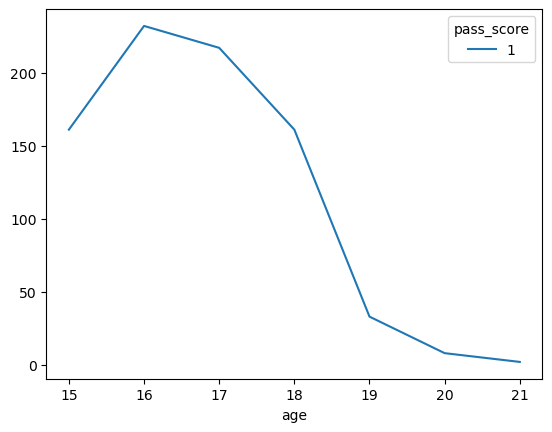

In [61]:
# Find the age group that is most prone to be successful
sns.lineplot(data=pd.crosstab(successful_students.age, successful_students.pass_score))

**Insights from the visualizations above:**  
a) There are more failures in the Math class rather than the Portuguese class.

b) Female students are slightly more likely to be successful students. 

c) Students aged 15-16 are performing much better than their elder students.  

d) Students from Gabriel Pereira school are performing much better than their peers from Mousinho da Silveira. 

e) Surprisingly, students who do not take extra classes are more likely to pass the year.

f) The less commuting from home to school takes, the more successful a student is. Unlike travel time, students that spend most time on studying do not perform best. The study time of 2-5 hours seems to be the optimal time for a successful student.

g) The parents' jobs do not make difference when it comes to the success of their child, however, their education does. When parents have no education, the child is most likely to fail.

h) The family size has lower impact than the relationship sttaus between the parents. When parents are raising their child together, the child is more likely to succeed.

i) Students who haven't failed the class before and the ones that do not get extra educational support from the school are more likely to succeed.

j) Predictably, the healthier the student, the more likely they are to succeed. Likewise, if they do not skip classes, they have higher chances to pass the class.

k) Students who do not drink alcohol and do not have a romantic relationship are more likely to be successful.

l) The access to nursery and internet as well as the intention to pursue higher education in the future are features of the majority of successful students.

m) Exctracurricular activities do not account much for the success of a student.

In [63]:
pass_students['pass_score'] = pd.to_numeric(pass_students['pass_score'], errors="coerce").fillna(0).astype('int64')
pass_students['final_performance'] = pd.to_numeric(pass_students['final_performance'], errors="coerce").fillna(0).astype('int64')
pass_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   object 
 1   sex                1044 non-null   object 
 2   age                1044 non-null   int64  
 3   address            1044 non-null   object 
 4   famsize            1044 non-null   object 
 5   Pstatus            1044 non-null   object 
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   Mjob               1044 non-null   object 
 9   Fjob               1044 non-null   object 
 10  reason             1044 non-null   object 
 11  guardian           1044 non-null   object 
 12  traveltime         1044 non-null   int64  
 13  studytime          1044 non-null   int64  
 14  failures           1044 non-null   int64  
 15  schoolsup          1044 non-null   object 
 16  famsup             1044 

In [64]:
pass_students['pass_score'].value_counts()

pass_score
1    814
0    230
Name: count, dtype: int64

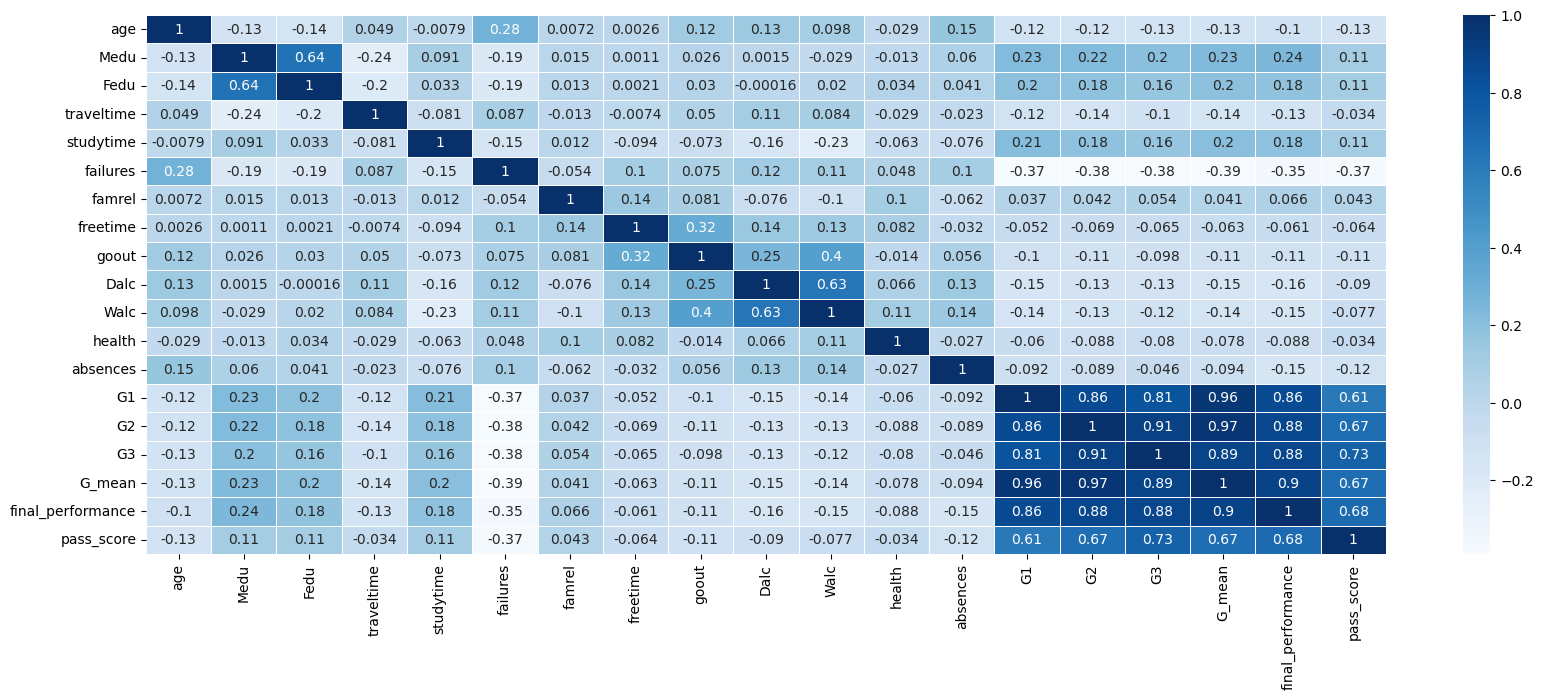

In [65]:
# Understand the correlation between the features in the dataset excluding the grades in the dataset
#no_grades_df = pass_students.drop(pass_students[['G1', 'G2', 'G3', 'G_mean', 'final_performance']], axis=1).copy()
corr = pass_students.corr(numeric_only = True)

plt.figure(figsize = (20,7))

# Use the initial dataset but exclude the first three columns (Row Number, Customer ID and Surname)
ax = sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

**After analysing the correlation between the variables, it seems the succesful score of a student is most impacted by their grades. When it comes to the rest of the factors, somehow important are also the level of education of their parents, the study time and the relationship between the parents.**

### 5. Models Selection

The two models I'm applying to predict the Portuguese student performance at secondary school are **Logisting Regression** and **Random Forest**. As there are only two possible outcomes (pass_score = 0 or pass_score = 1), the logistic regression model can predict the mathematical relationship between a set of independent values. On the other side, the random forest model doesn't require much of data preprocessing and is also one of the widely used for prediction models due to its robust performance.

### 6. Models Training

**a) Logistic Regression**

In [71]:
# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [72]:
# Predict on the test data
predictions = lr_model.predict(X_test)

In [73]:
# Calculate the accuracy
score = lr_model.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.7961783439490446


In [74]:
# Calculate the accuracy *another way*
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.7961783439490446


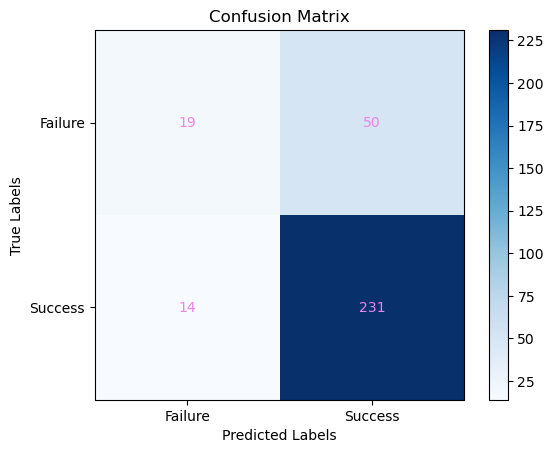

In [75]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Failure', 'Success'])
plt.yticks([0, 1], ['Failure', 'Success'])

# Display the values in each section of the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='violet')

# Show the plot
plt.show()

**b) Random Forest**

In [77]:
# Create and train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
# Predict on the test data
pred = rf_model.predict(X_test)

In [79]:
# Calculate the accuracy
acc = rf_model.score(X_test, y_test)
print("Accuracy: ", acc)

Accuracy:  0.8057324840764332


In [80]:
# Calculate the accuracy *another way*
accur = accuracy_score(y_test, pred)
print("Accuracy: ", accur)

Accuracy:  0.8057324840764332


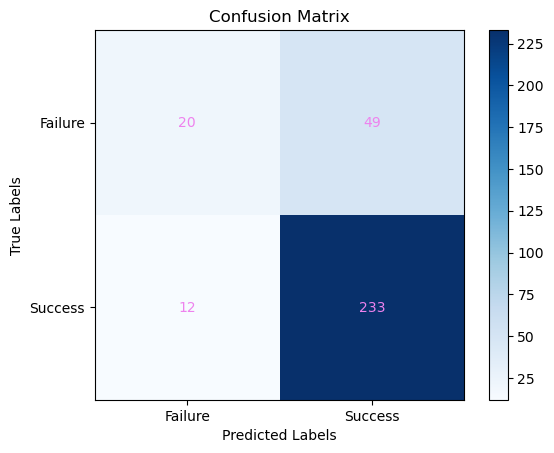

In [81]:
# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, pred)

# Plot the confusion matrix
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Failure', 'Success'])
plt.yticks([0, 1], ['Failure', 'Success'])

# Display the values in each section of the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='violet')

# Show the plot
plt.show()

### 7. Models Evaluation

In [83]:
print('Summary of Logistic Regression\n')
print(classification_report(y_test, predictions))
print('\nSummary of Random Forest\n')
print(classification_report(y_test, pred))

Summary of Logistic Regression

              precision    recall  f1-score   support

           0       0.58      0.28      0.37        69
           1       0.82      0.94      0.88       245

    accuracy                           0.80       314
   macro avg       0.70      0.61      0.63       314
weighted avg       0.77      0.80      0.77       314


Summary of Random Forest

              precision    recall  f1-score   support

           0       0.62      0.29      0.40        69
           1       0.83      0.95      0.88       245

    accuracy                           0.81       314
   macro avg       0.73      0.62      0.64       314
weighted avg       0.78      0.81      0.78       314



<Axes: title={'center': 'Feature Importance'}>

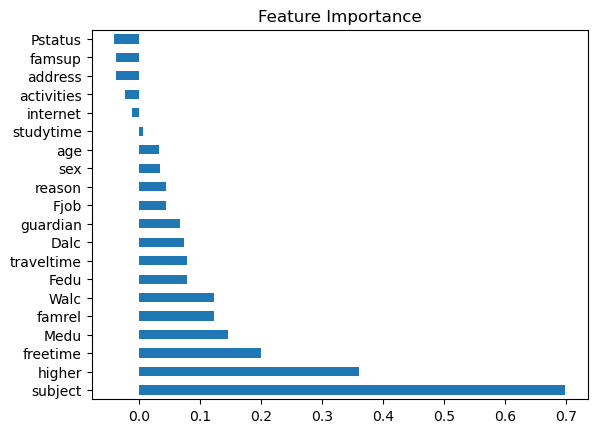

In [84]:
# Visualise the feature importance of the logistic regression model
importance = lr_model.coef_[0]
#print(importance)
features_importance = pd.Series(importance, index = X_test.columns)
features_importance.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [85]:
# Visualise the feature importance of the random forest model ordered by importance descending
def plot_feature_importance(model):
    features = X.columns
    importances = np.sort(model.feature_importances_)
    indices = np.argsort(importances)
    num_features = 10
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=importances[indices[-num_features:]], y=[features[i] for i in indices[-num_features:]], ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importance')

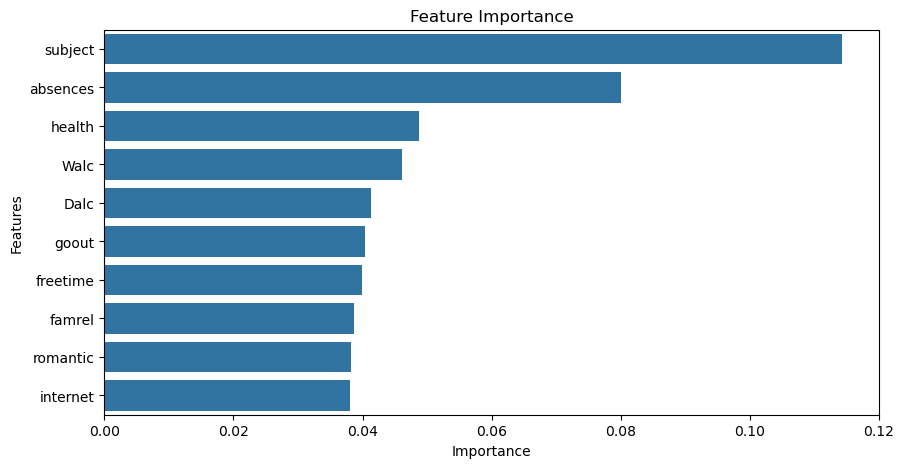

In [86]:
plot_feature_importance(rf_model)

### 8. Comparison and Recommendations

The two supervised models developed above are to explore secondary school students performance from different perspectives. It goes without saying that school grades are the ones taken into account when defining the final grade, however, students' performance could be explored from demographic point of you too. One obvious similarity for both models is the highest impact being driven by the subject. So for now onwards I will focus on the rest of the features (i.e. the demographic ones) to understand the differences between the models.

As we see, in the Logistic Regression model features such as intentions for higher education, free time after school and mother education have greater importance than the rest and are the ones impacting the outcome of the model most. In contrast, the Random Forest model puts more importance on other three feautures - number of school absences, current health status and alcohol consumption. Given that students' performance prediction have only two possible values (either pass or fail), Logistic Regression was selected to estimate the relationship between the dependent variable (in this dataset pass_score) and the other independent variables from the table. Indeed it is easy to implement, however, it can make a prediction about categorical variables only and is also prone to overfit. Unlike, Random Forest is a more robust model and can predict something of any kind  (both category and continuous variables), which makes it quite powerful to generalize performance.

The results from the models evaluation confirm the points just made. With 81% accuracy and overall better precision and recall results, the Random Forest model outperforms the Logistic Regression model. Through the feautures it counts on most, this model can help us understand what demographic features contribute most to the success of a student and also is aligned with the discoveries made earlier about the data. By leveraging these insights the schools could focus on facilitating students' school experience through promotion of further higher education and stimulation students to relax more after school.

Yet, despite the good results of the Random Forest model, there are some limitations of the performance. On one side, students' performance prediction results depend on the quality of historical data and preprocessing of the dataset. On the other one, there are some external factors that could also impact the final student's performance, however, are ignored in this exercise. For example, some schools leverage a different scoring system that is sometimes based on the competititive environment at school so the more strong students, the less the chance to get the highest score. As mentioned earlier, there might be a state/final exam impacting strongly the final grade of a student that is also not depicted in this dataset. For that reason, schools should constantly look for alternative data to enhance its prediction and understand better demographic factors impacting student performance.

To sum up, my recommendation is to leverage the Random Forest model after well-thought step-by-step preprocessing manipulation of the dataset. On top, to make the results even more precise, I would also take into account state/final exam results in addition to the existing feautures.